In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

### Introduction and Data Preparation:
This dataset describes various different statistics for over 12,000 bottles of wine including their acidity, pH value, density, and star rating ranging between 1 and 4. This data set can be used to try and predict the amount of wine bottles sold which is listed as "TARGET" here. To be able to do this, the dataset must be cleaned as there are many missing values among the various columns but before we can even begin to do that, we must organize the dataset into a format which is usable. To summarize the steps taken below, first the dataset is loaded from github, then the first column is removed since pandas provides its own row numbers so there's no need to list it twice. The basic descriptive statistics of the dataset are also listed, 16 columns, 12,795 rows, 6,359 observations have missing values, meaning that just under 50% of observation have at least one value missing. Since this is such a large number, it's not an option to just remove any rows missing data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/askidelsky/DAV-6150/main/Data%20Sets/Module%203/M3_Data%20(1).csv')
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
#get rid of unnamed column, no need for line numbers when pandas provides automatically
df1 = df.iloc[:,1:]
df1.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### Exploratory Data Analysis: Profiling the Data
Before delving into the data at hand, it's crucial to note the scope of the dataset. As stated above, there are 16 columns (14 explanatory variables, one predictor variable, and one identifier), 12,795 total observations, 6,359 observations with missing values, and 8,200 missing values scattered throughout the dataset. This amounts to slightly less than 50% of the total observations and because of this the strategy for data cleaning that involves just removing the problematic observations since that is nearly half of all observations. Additionally, it's important to notice that all variables are numeric but even so, INDEX, STARS, and LabelAppeal are categorical although INDEX is nominal and the other two are ordinal so can have similar replacement values applied to them as regular continuous variables. 

In [4]:
amt = 0
for i in range(len(df)):
    if df.loc[[i]].isna().sum().sum() > 0:
        amt += 1

print('Columns: ', len(df1.columns))
print('Total Amount of Missing Values: ', df1.isna().sum().sum())
print('Observations with Missing Values: ',amt)
print('Total Observations: ', len(df1))
print('Percentage Observations with Missing Values: ', round(100*(amt/len(df1)), 3),'%')

Columns:  16
Total Amount of Missing Values:  8200
Observations with Missing Values:  6359
Total Observations:  12795
Percentage Observations with Missing Values:  49.699 %


In [5]:
#all fields are numeric and are eligible for the replacement method of dealing with missing values
types = {}
for i in range(len(df1.columns)):
    types[df1.columns[i]] = type(df1.iloc[0,i])
types

{'INDEX': numpy.int64,
 'TARGET': numpy.int64,
 'FixedAcidity': numpy.float64,
 'VolatileAcidity': numpy.float64,
 'CitricAcid': numpy.float64,
 'ResidualSugar': numpy.float64,
 'Chlorides': numpy.float64,
 'FreeSulfurDioxide': numpy.float64,
 'TotalSulfurDioxide': numpy.float64,
 'Density': numpy.float64,
 'pH': numpy.float64,
 'Sulphates': numpy.float64,
 'Alcohol': numpy.float64,
 'LabelAppeal': numpy.int64,
 'AcidIndex': numpy.int64,
 'STARS': numpy.float64}

### Exploratory Data Analysis: Distribution and Correlation of the Variables
Two notes before diving into information derived from the EDA, first off this is done before editing any problematic observations, this will show to have an extreme effect on the results on typical EDA methods. Second, I removed the INDEX column from all analysis since it's just an arbitrary identifier and should have no effect on the results of any machine learning algorithm applied. Looking at the descriptive statistics below, it's interesting to note that all variables have relatively low standard deviations.

In [6]:
df1.iloc[:,1:].describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The boxplot below is an extremely abnormal display of these statistics. Based on the amount of dots outside of the boxes, it seems that there are a lot more outliers than not. Additionally, each variable has a tiny range with only ResidualSugar, FreeSulfurDioxide, and TotalSulfurDioxide having truly visible boxes to even make any sort of analysis on. Both of these phenomena can most likely be attributed to the large of missing values in the data set.

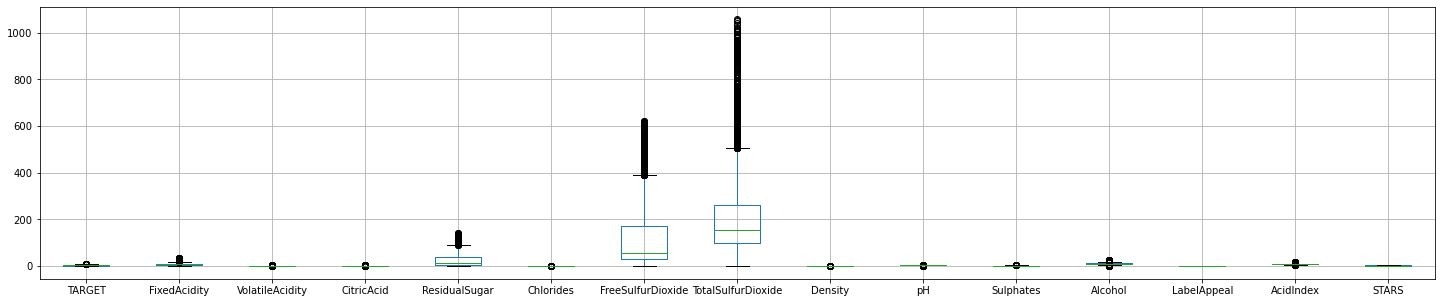

In [7]:
boxplot= df1.iloc[:,1:].boxplot(figsize=(25,5))

Note the distributions shown by these histograms. Assuming that this dataset is diverse to contain observations of all sales levels, I would expect more of the variables, at least the important ones, to have normal distributions. The fact that TARGET has a relatively normal distribution is indicative of the fact that it is somewhat of a diverse dataset. However, only five out of the remaining 14 variables have even close to normal distributions. It could be that I am not well versed enough in wine to make sense of this but I would expect more to be closer to normal. STARS could possibly be considered normal except it doesn't show any values for 2.5. This extremely surprising since out of a sample of close to 12,800 bottles not a single one is rated 2.5? I think that again this phenomenon can be attributed to the surplus of missing data. Additionally, the unique values of the bottles with no STARS value have a wide range so fitting each of them with 2.5 for STARS might not be the best replacement technique.

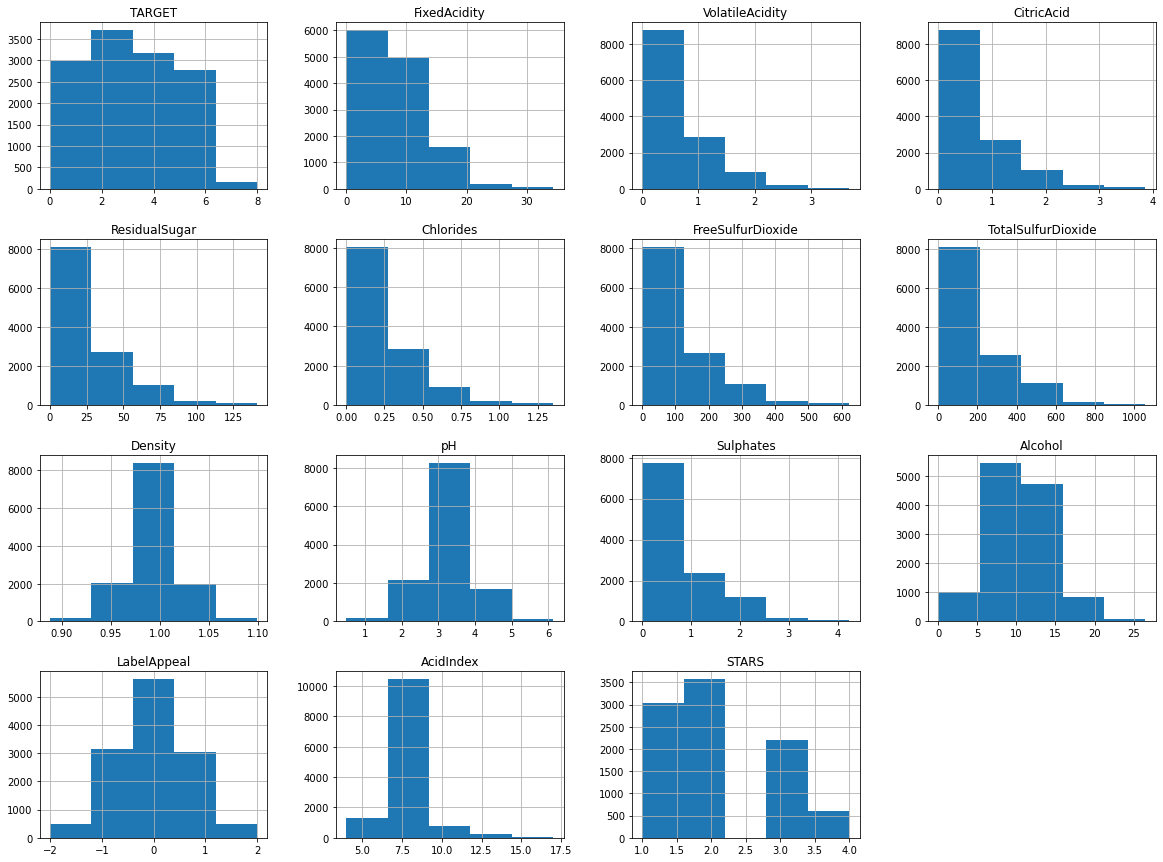

In [8]:
df1.iloc[:,1:].hist(bins = 5, figsize = (20,15))
plt.show()

In [9]:
df2 = df1[df1.STARS.isna() == True]
print('STARS: ', np.sort(df2.TARGET.unique()), np.std(df2.TARGET))

STARS:  [0 1 2 3 4 5 6 7 8] 1.6576314960939922


Looking at the correlation matrix, this is also very troubling and likely a product of the missing data. None of these values are high enough that I would feel comfortable calling them good predictors in their present form. In fact, the closest result by far is still only approximately 56%. Hopefully this will be resolved as the data is cleaned.

In [10]:
corr = df1.corr()
corr['TARGET'].sort_values(ascending=False)

TARGET                1.000000
STARS                 0.558794
LabelAppeal           0.356500
Alcohol               0.063394
TotalSulfurDioxide    0.035253
FreeSulfurDioxide     0.024503
CitricAcid            0.013953
ResidualSugar         0.003645
INDEX                 0.001256
pH                   -0.009445
Chlorides            -0.028463
Sulphates            -0.035259
Density              -0.035518
FixedAcidity         -0.052984
VolatileAcidity      -0.070195
AcidIndex            -0.246049
Name: TARGET, dtype: float64

### Exploratory Data Analysis: Scope of Missing Data
Before cleaning the data it is important to know just how the missing values fall out. As can be seen below, there are eight variables with significant amount of missing values, with STARS leading the way by a troubling amount, a chart below shows a visual of a steep drop off in existing values once we get to STARS. For a couple other analysis points I felt it was important to create a smaller table of just the variables with missing values and I again showed the descriptive statistics as before. Based on the amount of missing values with STARS leading the way by a large margin, you may think that it may just be easier to remove the column as it isn't relevant but after reading the data dictionary I feel that it's important to keep especially since it had the highest correlation score while having the most missing values.

In [11]:
nas = {}
for i in range(len(df1.columns)):
    if df1.iloc[:,i].isna().sum() > 0:
        nas[df1.columns[i]] = df1.iloc[:,i].isna().sum()
nas

{'ResidualSugar': 616,
 'Chlorides': 638,
 'FreeSulfurDioxide': 647,
 'TotalSulfurDioxide': 682,
 'pH': 395,
 'Sulphates': 1210,
 'Alcohol': 653,
 'STARS': 3359}

In [12]:
dfNa = df1[['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']]
dfNa.head()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
0,54.2,0.567,NaN,268.0,3.33,0.59,9.9,2.0
1,26.1,0.425,15.0,327.0,3.38,0.70,NaN,3.0
2,14.8,0.037,214.0,142.0,3.12,0.48,22.0,3.0
3,18.8,0.425,22.0,115.0,2.24,1.83,6.2,1.0
4,9.4,NaN,167.0,108.0,3.12,1.77,13.7,2.0


In [13]:
countNas = dfNa.describe().iloc[0,:].sort_values(ascending = False)
countNas

pH                    12400.0
ResidualSugar         12179.0
Chlorides             12157.0
FreeSulfurDioxide     12148.0
Alcohol               12142.0
TotalSulfurDioxide    12113.0
Sulphates             11585.0
STARS                  9436.0
Name: count, dtype: float64

In [14]:
dfNa.describe()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
count,12179.000000,12157.000000,12148.000000,12113.000000,12400.000000,11585.000000,12142.000000,9436.000000
mean,23.367809,0.222559,106.679042,204.319120,3.207628,0.846668,10.523778,2.041755
std,24.945667,0.234288,108.102694,163.116881,0.679687,0.655612,3.629154,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000,0.000000,1.000000
25%,3.600000,0.046000,28.000000,100.000000,2.960000,0.430000,9.000000,1.000000
50%,12.900000,0.098000,56.000000,154.000000,3.200000,0.590000,10.400000,2.000000
75%,38.700000,0.368000,172.000000,262.000000,3.470000,1.100000,12.400000,3.000000
max,141.150000,1.351000,623.000000,1057.000000,6.130000,4.240000,26.500000,4.000000


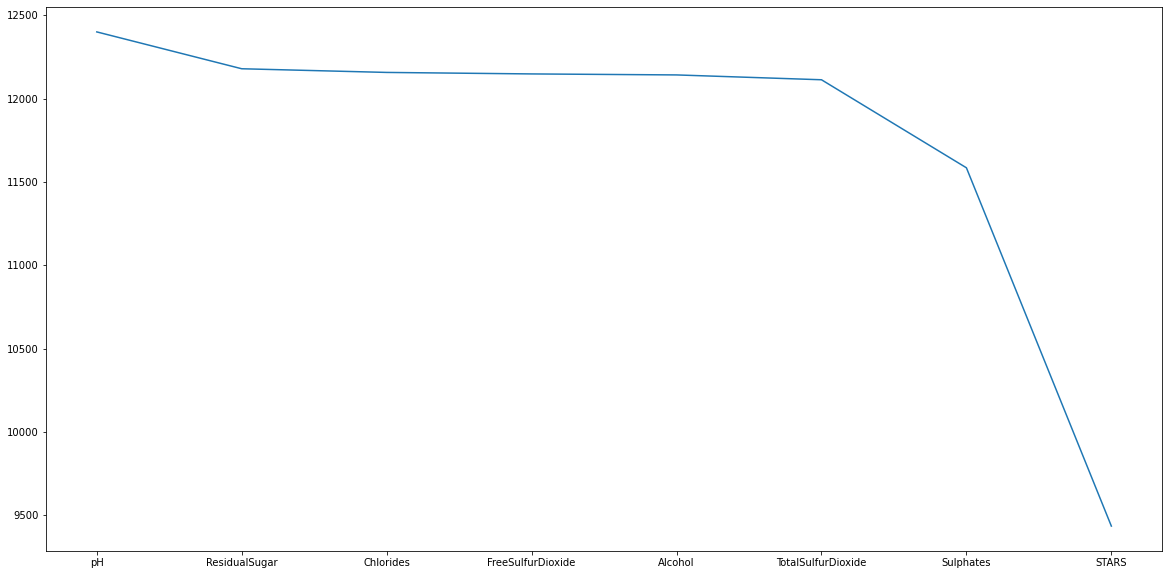

In [15]:
countNas.plot(figsize = (20,10))
plt.show()

### Data Cleaning: pH
pH needs to be examined on its own since it has by far the least amount of missing values. Usually, we would think that since a column has the least amount of missing data it's a bad candidate to be removed as a whole since there is less to do to it. However, I think that in this case it's exactly the opposite scenario. pH has over 96% of its values filled in and yet still has by far the lowest correlation with TARGET, our response variable. Since the whole point of this data is to be able to predict TARGET, pH must not be a very good predictor due to its extremely low correlation value, -0.009, yet still having almost everything filled out. That is why I decided to remove it to make the rest of data processing from here on out easier and faster.

In [16]:
df1.drop(columns = ['pH'], inplace = True)
df1.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'STARS'],
      dtype='object')

### Data Cleaning: STARS
Since the most troubling variable with missing values is by far STARS, I thought I would start my cleanup there. My first thought was if there was a different variable with a high enough correlation value with STARS to replace it. Sadly, there is none, the closest is LabelAppeal at 33.5% which is subpar to say the least. Although I would like to be able to assign some of these missing values 2.5, there simply isn't any information to base that off of. With the amount of observations with missing values and given the fact that the missing values aren't centered on just a couple values for TARGET, I felt comfortable replacing the missing values with the mode since it wouldn't affect the spread of the data too much. I also thought that it is noteworthy when doing analysis to know if the value was filled in or not for this specific variable so I decided to add a column indicating if it was originally empty or not. Note that mean can't be used since the value may not return as divisible by 0.5. 

In [17]:
corr['STARS'].sort_values(ascending = False)

STARS                 1.000000
TARGET                0.558794
LabelAppeal           0.334788
Alcohol               0.065273
ResidualSugar         0.009897
Chlorides             0.002516
FreeSulfurDioxide     0.002465
CitricAcid            0.001627
INDEX                 0.000194
pH                   -0.000488
Sulphates            -0.001227
TotalSulfurDioxide   -0.001291
Density              -0.018284
FixedAcidity         -0.018505
VolatileAcidity      -0.030154
AcidIndex            -0.086259
Name: STARS, dtype: float64

In [18]:
was_missing = []
for i in range(len(df1.STARS)):
    if df1.STARS[i] > 0:
        was_missing.append(0)
    else:
        was_missing.append(1)
df1['stars_missing'] = was_missing
df1.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'STARS',
       'stars_missing'],
      dtype='object')

In [19]:
df1[['STARS']] = df1[['STARS']].fillna(value=stats.mode(df1.STARS))
df1.STARS.isna().sum()

0

### Data Cleaning: All Others
I decided to analyze the rest together since they are neither the most problematic and least problematic and upon inspection can be handled similarly. Before proceeding, I found it important to check if any of them can be replaced by another, looking at the correlation matrix below, none of them are remotely close to colinear. On further inspection of their unique values and standard deviation, none of them seem to be restricted to a specific value and all have a similar standard deviation relative to their metrics. This gives the indication that replacement methods will work without much affect to the overall representation of the data. One area where they differ is that FreeSulfurDioxide and TotalSulfurDioxide are represented as whole numbers while the other three are shown as having decimal values. For this reason, they would need to be replaced with different operators. The missing values in FreeSulfurDioxide and TotalSulfurDioxide should be replaced with whole numbers so that the format and information in those columns is consistent. The ideal method would be to use the median but since there are missing values python can't calculate median and we use mode instead. Since the other three are shown as having decimals, those missing values can be filled in using mean as the method, which is my personal choice method when dealing with decimals.

In [20]:
a = df1[['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Alcohol', 'Sulphates']]
a.corr()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Alcohol,Sulphates
ResidualSugar,1.000000,-0.002837,-0.007418,0.014476,-0.006927,-0.007658
Chlorides,-0.002837,1.000000,-0.004884,-0.015316,-0.001174,0.021366
FreeSulfurDioxide,-0.007418,-0.004884,1.000000,0.014710,-0.011384,-0.002096
TotalSulfurDioxide,0.014476,-0.015316,0.014710,1.000000,-0.033102,-0.010995
Alcohol,-0.006927,-0.001174,-0.011384,-0.033102,1.000000,0.000251
Sulphates,-0.007658,0.021366,-0.002096,-0.010995,0.000251,1.000000


In [21]:
rs = df1[df1.ResidualSugar.isna() == True]
c = df1[df1.Chlorides.isna() == True]
fso = df1[df1.FreeSulfurDioxide.isna() == True]
tso = df1[df1.TotalSulfurDioxide.isna() == True]
a = df1[df1.Alcohol.isna() == True]
s = df1[df1.Sulphates.isna() == True]
print('ResidualSugar: ', np.sort(rs.TARGET.unique()), np.std(df1.ResidualSugar))
print('Chlorides: ', np.sort(c.TARGET.unique()), np.std(df1.Chlorides))
print('FreeSulfurDioxide: ', np.sort(fso.TARGET.unique()), np.std(df1.FreeSulfurDioxide))
print('TotalSulfurDioxide: ', np.sort(tso.TARGET.unique()), np.std(df1.TotalSulfurDioxide))
print('Alcohol: ', np.sort(a.TARGET.unique()), np.std(df1.Alcohol))
print('Sulphates: ', np.sort(s.TARGET.unique()), np.std(df1.Sulphates))

ResidualSugar:  [0 1 2 3 4 5 6 7] 24.94464297696968
Chlorides:  [0 1 2 3 4 5 6 7 8] 0.23427813897281105
FreeSulfurDioxide:  [0 1 2 3 4 5 6 7 8] 108.09824427443841
TotalSulfurDioxide:  [0 1 2 3 4 5 6 7] 163.11014752469512
Alcohol:  [0 1 2 3 4 5 6 7 8] 3.6290045838564424
Sulphates:  [0 1 2 3 4 5 6 7 8] 0.6555836461018836


In [22]:
df1[['FreeSulfurDioxide']] = df1[['FreeSulfurDioxide']].fillna(value = stats.mode(df1.FreeSulfurDioxide))
df1[['TotalSulfurDioxide']] = df1[['TotalSulfurDioxide']].fillna(value = stats.mode(df1.TotalSulfurDioxide))

In [23]:
df1[['ResidualSugar']] = df1[['ResidualSugar']].fillna(value = np.mean(df1.ResidualSugar))
df1[['Chlorides']] = df1[['Chlorides']].fillna(value = np.mean(df1.Chlorides))
df1[['Alcohol']] = df1[['Alcohol']].fillna(value = np.mean(df1.Alcohol))
df1[['Sulphates']] = df1[['Sulphates']].fillna(value = np.mean(df1.Sulphates))

In [24]:
print('FreeSulfurDioxide: ', df1.FreeSulfurDioxide.isna().sum())
print('TotalSulfurDioxide: ', df1.TotalSulfurDioxide.isna().sum())
print('ResidualSugar: ', df1.ResidualSugar.isna().sum())
print('Chlorides: ', df1.Chlorides.isna().sum())
print('Alcohol: ', df1.Alcohol.isna().sum())
print('Sulphates: ', df1.Sulphates.isna().sum())

FreeSulfurDioxide:  0
TotalSulfurDioxide:  0
ResidualSugar:  0
Chlorides:  0
Alcohol:  0
Sulphates:  0


### Repeating EDA: Which Steps are Repeated
As can be shown by the code below, all missing values have been removed. Before, the dictionary showed each column name with missing values along with its totals. You can also see this in the description as the count of all values is uniform and matches all values. I decided to also show the histograms and box plots to show the change in the structure of the data post-transformation. Finally, I decided to show the correlation for TARGET with the rest of the variables. The interpretation of these will be addressed in the conclusion.

In [25]:
#no reaming missing values after all transformations are completed:
nas = {}
for i in range(len(df1.columns)):
    if df1.iloc[:,i].isna().sum() > 0:
        nas[df1.columns[i]] = df1.iloc[:,i].isna().sum()
nas

{}

In [26]:
df1.iloc[:,1:].describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,stars_missing
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,102.751075,200.890778,0.994203,0.846668,10.523778,-0.009066,7.772724,2.030793,0.262524
std,1.926368,4.996119,0.555614,0.606005,24.337722,0.228371,106.700184,159.366126,0.026538,0.623840,3.535326,0.891089,1.323926,0.775276,0.440023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.000000,0.000000,-2.000000,4.000000,1.000000,0.000000
25%,2.000000,5.600000,0.250000,0.280000,4.000000,0.046000,29.000000,102.000000,0.987720,0.450000,9.100000,-1.000000,7.000000,2.000000,0.000000
50%,3.000000,7.000000,0.410000,0.440000,14.200000,0.120000,51.000000,147.500000,0.994490,0.640000,10.500000,0.000000,8.000000,2.000000,0.000000
75%,4.000000,9.800000,0.910000,0.970000,37.200000,0.353000,164.000000,251.000000,1.000515,1.000000,12.200000,1.000000,8.000000,2.000000,1.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,4.240000,26.500000,2.000000,17.000000,4.000000,1.000000


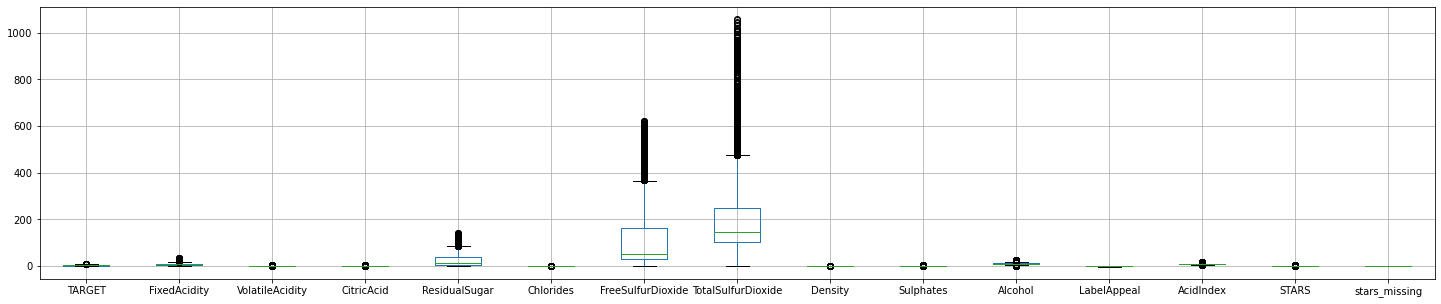

In [27]:
boxplot= df1.iloc[:,1:].boxplot(figsize=(25,5))

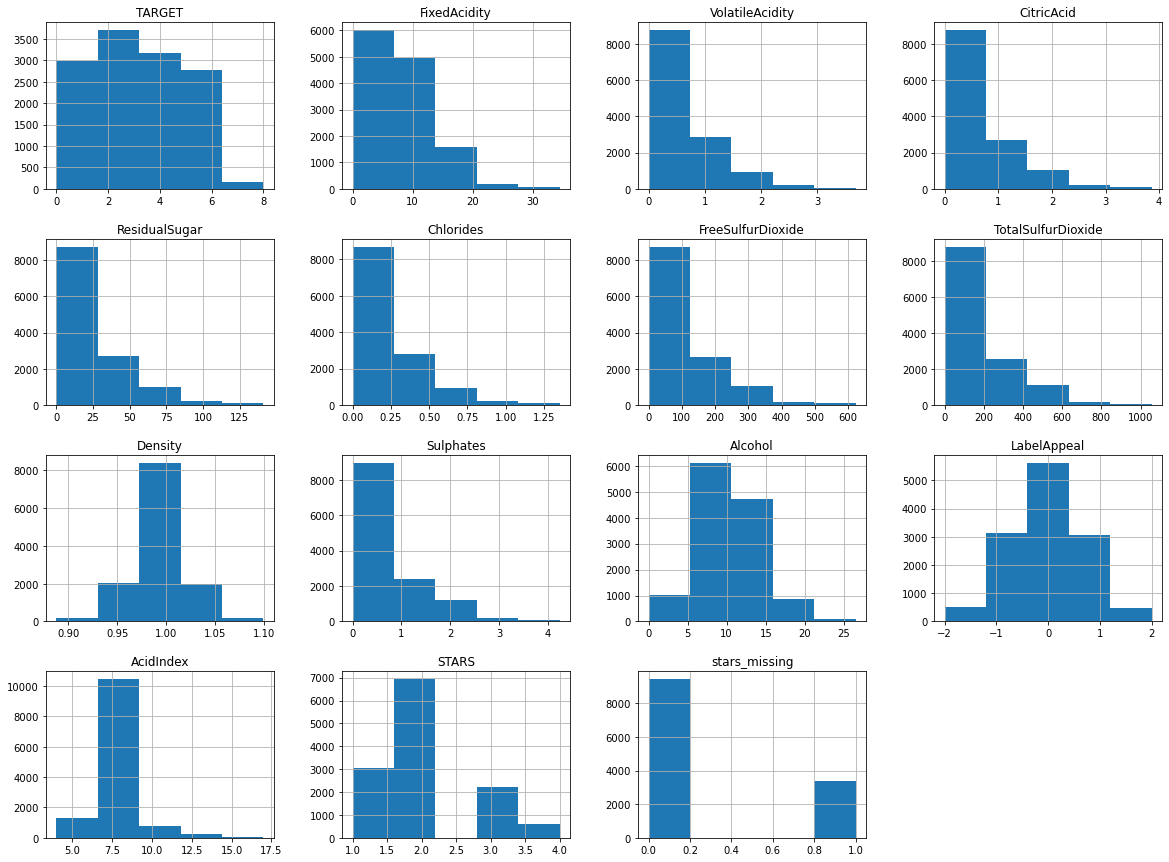

In [28]:
df1.iloc[:,1:].hist(bins = 5, figsize = (20,15))
plt.show()

In [29]:
corr = df1.corr()
corr['TARGET'].sort_values(ascending=False)

TARGET                1.000000
STARS                 0.400135
LabelAppeal           0.356500
Alcohol               0.061730
TotalSulfurDioxide    0.033606
FreeSulfurDioxide     0.023585
CitricAcid            0.013953
ResidualSugar         0.003552
INDEX                 0.001256
Chlorides            -0.027704
Sulphates            -0.033496
Density              -0.035518
FixedAcidity         -0.052984
VolatileAcidity      -0.070195
AcidIndex            -0.246049
stars_missing        -0.571579
Name: TARGET, dtype: float64

### Conclusion:
Looking at the above loop, it is evident that the missing values are all gone as well as in the describe table, the amount of values is uniform for each variable including those that never had any missing values. The distributions didn't change much since the missing values all came from mode, median, or mean, meaning that they shouldn't have altered the distribution since those are all ways of calculating the approximate middle value of any set. The only difference seen looking at the histograms is the presence of more values. The box plot is more evident of a change, there are slight increases in the size of the boxes and in the amount of variables that have boxes in the first place. The most telling finding is in the correlation table. Shockingly, the correlation between STARS and TARGET actually went down with more values. This may be because with replacement we are possibly bringing down the average and distribution slightly. The stars_missing is a strong predictor at 57% which is indicative that the missing values in the initial set actually signified something as opposed to just being left blank. Earlier, we withheld removing low correlation values since the data wasn't fully filled in. Now that the data is complete, I would feel comfortable eliminating the extremely low predictors such as ResidualSugar, CitricAcid, FreeSulfurDioxide, TotalSulfurDioxide, and Alcohol among others. The extremely low correlation values across the board signify to me that one variable may not be enough of a predictor on its own and some may need to be combined as interaction variables to be able to have real significance, for instance LabelAppeal and STARS.